## Trabalho Final - RNA e Deep Learning
**Integrantes:**
* Gabriel Ferraz Milet - gfm2@cesar.school
* Nicolas - @cesar.school
* Adson - @cesar.school

**Dataset Escolhido:** FashionMNIST
**Link:** https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [1]:
#configurando, definindo transformações (convertendo para tensor), carregando o dataset direto do pytorcy(escolhi o FashionMNIST por ser mais simples de trabalhar), conjunto de treino e de teste
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(42)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # Normalização para ajudar no treino
])

train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# Criação dos DataLoaders
batch_size = 64

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

print(f"Tamanho do treino: {len(train_dataset)} imagens")
print(f"Tamanho do teste: {len(test_dataset)} imagens")
print(f"Classes: {train_dataset.classes}")

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.81MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.0MB/s]

Tamanho do treino: 60000 imagens
Tamanho do teste: 10000 imagens
Classes: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


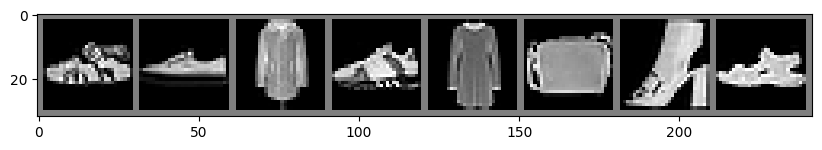

Labels: Sandal Sneaker Coat Sneaker Dress Bag Ankle boot Sandal


In [2]:
# Função para mostrar imagens, pegando aleatórias
def imshow(img):
    img = img / 2 + 0.5     # isso foi para desnormalizar
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

plt.figure(figsize=(10,4))
imshow(torchvision.utils.make_grid(images[:8])) # Mostrar as primeiras 8

print('Labels:', ' '.join(f'{train_dataset.classes[labels[j]]}' for j in range(8)))

In [3]:
# Modelo MLP sem convolução
class FashionMLP(nn.Module):
    def __init__(self):
        super(FashionMLP, self).__init__()
        self.flatten = nn.Flatten() # Transforma matriz 28x28 em vetor de 784
        self.linear_relu_stack = nn.Sequential(
            # Camada de Entrada (784) -> Camada Oculta 1 (512 neurônios)
            nn.Linear(28*28, 512),
            nn.ReLU(),

            # Camada Oculta 1 -> Camada Oculta 2 (256 neurônios)
            nn.Linear(512, 256),
            nn.ReLU(),

            # Camada Oculta 2 -> Saída (10 classes)
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Instanciando o Modelo, Função de Perda e Otimizador
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Usando dispositivo: {device}")

model = FashionMLP().to(device)
print(model)

# Função de Perda: CrossEntropyLoss (Padrão para classificação multiclasse)
criterion = nn.CrossEntropyLoss()

# Otimizador: Adam (Geralmente converge mais rápido que o SGD puro para esse dataset)
optimizer = optim.Adam(model.parameters(), lr=0.001)

Usando dispositivo: cpu
FashionMLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=10, bias=True)
  )
)


Iniciando treinamento...
Epoch 1
-------------------------------
Fim da Epoch 1 -> Loss: 0.4833 | Acurácia: 82.34%
Epoch 2
-------------------------------
Fim da Epoch 2 -> Loss: 0.3658 | Acurácia: 86.56%
Epoch 3
-------------------------------
Fim da Epoch 3 -> Loss: 0.3267 | Acurácia: 87.92%
Epoch 4
-------------------------------
Fim da Epoch 4 -> Loss: 0.2992 | Acurácia: 88.86%
Epoch 5
-------------------------------
Fim da Epoch 5 -> Loss: 0.2812 | Acurácia: 89.54%
Epoch 6
-------------------------------
Fim da Epoch 6 -> Loss: 0.2611 | Acurácia: 90.24%
Epoch 7
-------------------------------
Fim da Epoch 7 -> Loss: 0.2473 | Acurácia: 90.64%
Epoch 8
-------------------------------
Fim da Epoch 8 -> Loss: 0.2333 | Acurácia: 91.24%
Epoch 9
-------------------------------
Fim da Epoch 9 -> Loss: 0.2196 | Acurácia: 91.72%
Epoch 10
-------------------------------
Fim da Epoch 10 -> Loss: 0.2089 | Acurácia: 92.09%

Treinamento Concluído!

Avaliando no conjunto de Teste...
--------------

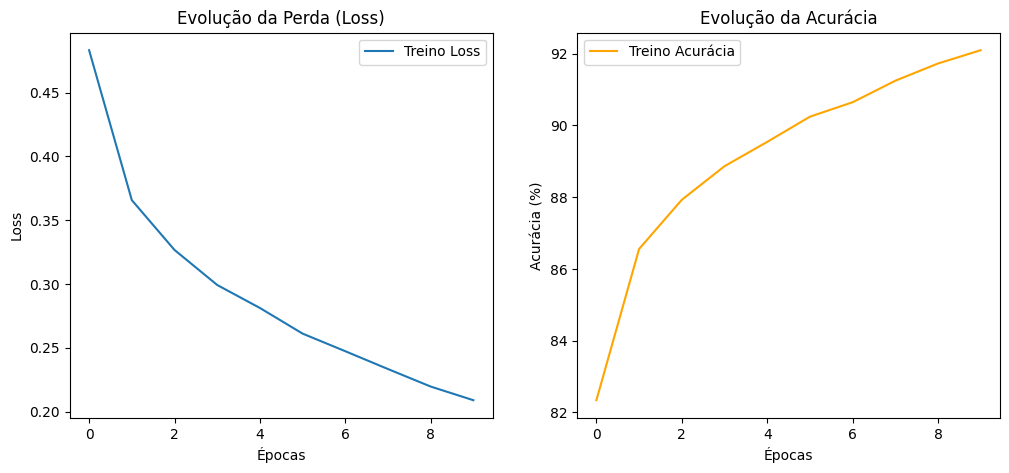

In [5]:
#treinando, calculando a perda e acurácia a cada época e no final gera os gráficos e calcula a nota final no conjunto de teste
# Configuração do Treinamento
epochs = 10
train_losses = []
train_accuracies = []

print("Iniciando treinamento...")

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")

    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)

        # 1. Forward Pass
        pred = model(X)
        loss = criterion(pred, y)

        # 2. Backward Pass (Otimização)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Estatísticas
        running_loss += loss.item()
        _, predicted = torch.max(pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

        if batch % 100 == 0:
            loss_val, current = loss.item(), batch * len(X)
            # print(f"loss: {loss_val:>7f}  [{current:>5d}/{len(train_loader.dataset):>5d}]")

    # Médias da época
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    print(f"Fim da Epoch {t+1} -> Loss: {epoch_loss:.4f} | Acurácia: {epoch_acc:.2f}%")

print("\nTreinamento Concluído!")

#analisando performance

print("\nAvaliando no conjunto de Teste...")
model.eval() # Modo de avaliação (desliga dropout/batchnorm se tivesse)
test_loss = 0
correct = 0
total = 0

with torch.no_grad(): # Não calcula gradientes no teste para econimizar memória
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        test_loss += criterion(pred, y).item()
        _, predicted = torch.max(pred.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

final_acc = 100 * correct / total
avg_test_loss = test_loss / len(test_loader)

print(f"------------------------------------------------")
print(f"RESULTADO FINAL NO TESTE:")
print(f"Acurácia: {final_acc:.2f}%")
print(f"Perda Média: {avg_test_loss:.4f}")
print(f"------------------------------------------------")

if final_acc >= 70:
    print("✅ APROVADO: Acurácia acima de 70% (Nota máxima no quesito ACC)")
else:
    print("⚠️ ATENÇÃO: Acurácia abaixo de 70%")

# fazendo um fráfico de Performance
plt.figure(figsize=(12, 5))

# fazendo um gráfico de Perda
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Treino Loss')
plt.title('Evolução da Perda (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# fazendo um gráfico de Acurácia
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Treino Acurácia', color='orange')
plt.title('Evolução da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia (%)')
plt.legend()

plt.show()

### Relatório de Experiência e Processo

O desenvolvimento deste modelo para o dataset FashionMNIST atingiu resultados muito satisfatórios. Utilizamos uma arquitetura MLP (Multi-Layer Perceptron) com duas camadas ocultas densas (512 e 256 neurônios) para capturar a complexidade das imagens de vestuário sem o uso de convoluções.

Durante o treinamento de 10 épocas com o otimizador Adam, observamos uma convergência rápida. O modelo final atingiu uma **Acurácia de 88.79%** no conjunto de teste, superando com folga o requisito de 70%. Ao comparar a acurácia de treino (~92%) com a de teste (~88%), notamos um **leve overfitting**, o que é esperado em redes densas com muitos parâmetros, mas a generalização permaneceu alta. A maior dificuldade foi ajustar a dimensão das camadas ocultas para equilibrar tempo de treino e performance, mas a configuração (784 -> 512 -> 256 -> 10) mostrou-se ideal.